In [202]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [203]:
df =pd.read_csv('Downloads/archive/data/us_simplified.csv')

In [204]:
df["Date"] = pd.to_datetime(df["Date"])

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680284 entries, 0 to 2680283
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   Admin2          object        
 2   Province/State  object        
 3   Confirmed       int64         
 4   Deaths          int64         
 5   Country/Region  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 122.7+ MB


In [206]:
df = df.drop(columns =['Admin2', 'Province/State', 'Country/Region'])

In [207]:
df["DeathRate"] = round(df["Deaths"] / df["Confirmed"] * 100, 2)
df
style.use("bmh")

Text(0, 0.5, 'Death rate in precentages')

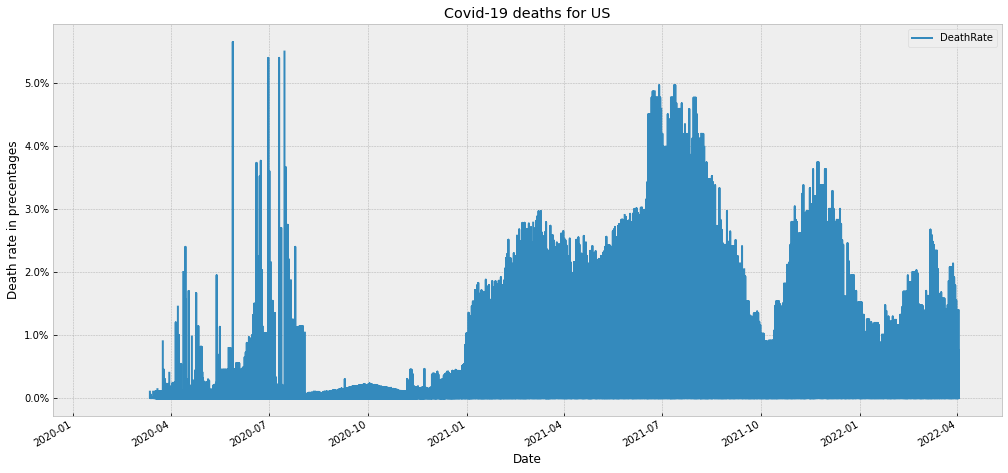

In [208]:
#visualizing the rate of death among those infected in the US

deathRate = df.plot(figsize = (17, 8), x = "Date", y = "DeathRate")
deathRate.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100000))
plt.title("Covid-19 deaths for US")
deathRate.set_ylabel("Death rate in precentages")

In [209]:
df1 = pd.read_csv('Downloads/vaxData/country_vaccinations.csv')

In [210]:
df1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [211]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [213]:
df1 = df1[["country", "date", "people_vaccinated"]]
df1.head()

,country,date,people_vaccinated
0,Afghanistan,2021-02-22,0.0
1,Afghanistan,2021-02-23,NaN
2,Afghanistan,2021-02-24,NaN
3,Afghanistan,2021-02-25,NaN
4,Afghanistan,2021-02-26,NaN


In [220]:
us = df1["country"].str.contains("United States")

In [223]:
#new dataframe with only US vax data
df1[us]
df1 = df1[us][['country','date','people_vaccinated']]

In [225]:
df1["date"] = pd.to_datetime(df1["date"])


In [227]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 82360 to 82830
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   country            471 non-null    object        
 1   date               471 non-null    datetime64[ns]
 2   people_vaccinated  471 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.7+ KB


(0.0, 300000000.0)

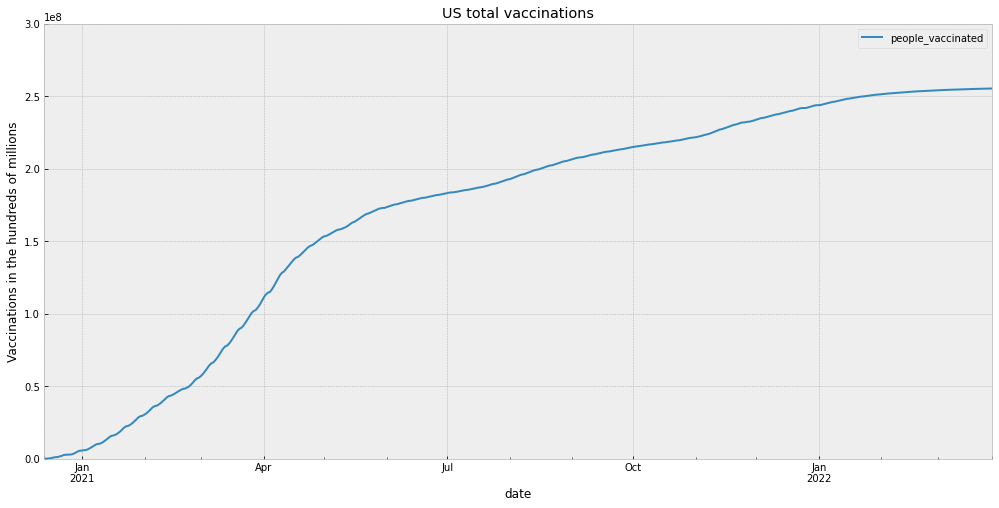

In [228]:
ax = df1.plot(figsize = (17, 8), x = "date", y = "people_vaccinated")
plt.title("US total vaccinations")
ax.set_ylabel("Vaccinations in the hundreds of millions")
ax.set_ylim(0, 300000000)

In [229]:
df1['date'] = df1['date'].map(dt.datetime.toordinal)

In [230]:
#creating the linear regression model and feeding data
y = py.asarray(df1['people_vaccinated'])
x = py.asarray(df1['date'])
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.7, random_state = 42)
model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)
model.score(x_train.reshape(-1,1), y_train)
ypred = model.predict(x.astype(float).reshape(-1,1))
print(model.coef_)
print(model.intercept_)



[540430.84220598]
-398669270757.77704


In [231]:
df1['pred'] = ypred

In [236]:
df1['date'] = df1['date'].map(dt.datetime.fromordinal)

<AxesSubplot:xlabel='date'>

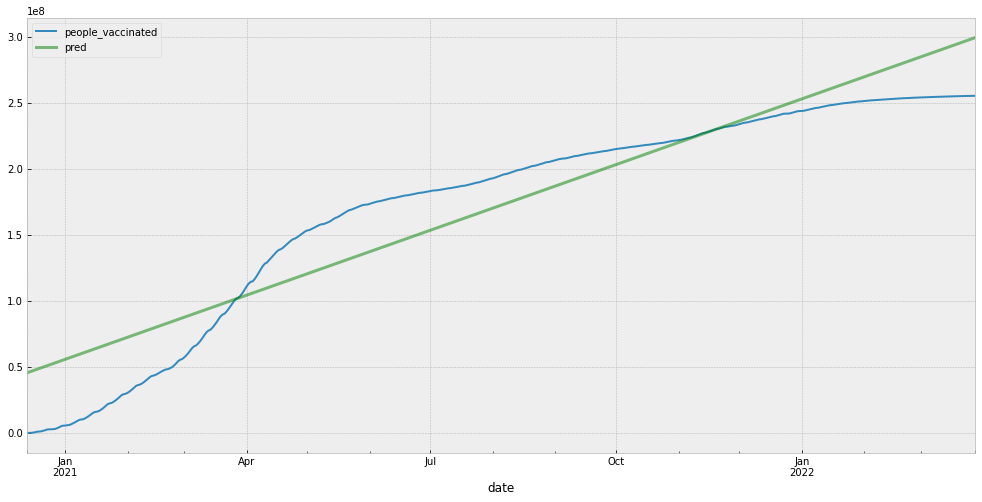

In [237]:
ax = df1.plot(figsize = (17,8), x = 'date', y = 'people_vaccinated')
df1.plot(x = 'date', y = 'pred', color = 'green', linewidth = 3, ax = ax, alpha = .5)